<a href="https://colab.research.google.com/github/Sadanand-666/Lung-Cancer-Risk-Prediction/blob/main/lung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import joblib

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML Projects/updated_dataset.csv")


In [2]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


In [3]:
df.columns  # To access the columns of the dataframe


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace('_', ' ').str.upper()  # Convert to match the training feature names


In [5]:
df.columns  # To access the columns of the dataframe


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW FINGERS', 'ANXIETY',
       'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER'],
      dtype='object')

In [6]:
# Assume last column is the target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encode categorical columns in features
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Encode target if it's categorical
if y.dtype == 'object':
    le_target = LabelEncoder()
    y = le_target.fit_transform(y)
    joblib.dump(le_target, 'label_encoder.pkl')  # Save encoder for decoding predictions later

In [7]:

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [8]:
# Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Save model
joblib.dump(model, "model.pkl")
print("Model saved as model.pkl")

Accuracy: 0.97
Model saved as model.pkl


Confusion Matrix:
[[ 1  1]
 [ 1 59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



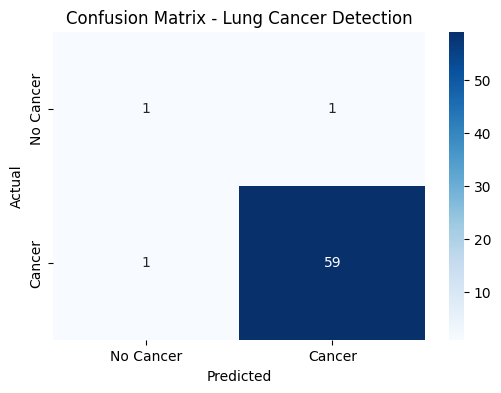

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Cancer', 'Cancer'], yticklabels=['No Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Lung Cancer Detection')
plt.show()



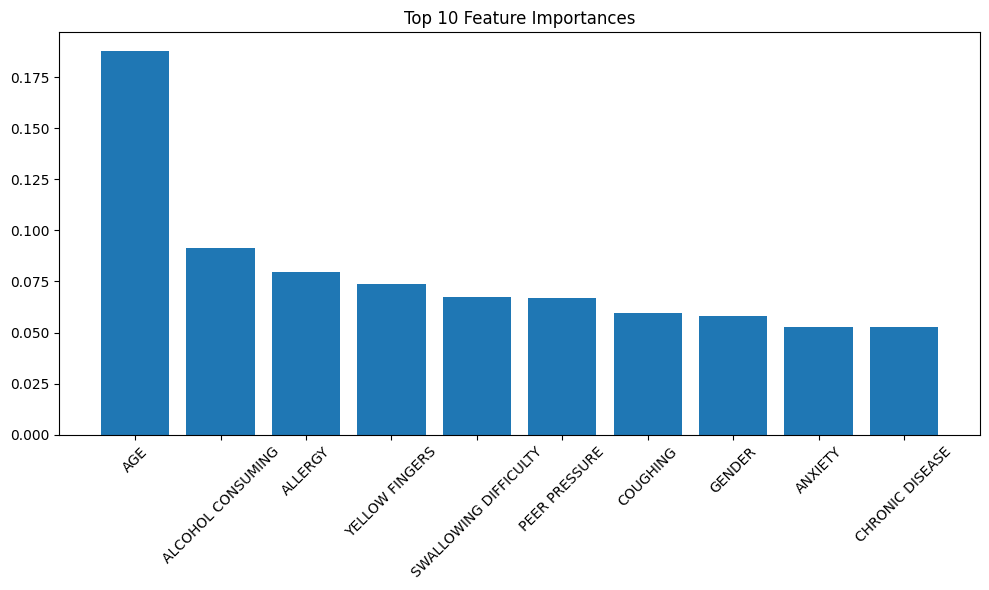

In [10]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X.columns

# Plot top 10 features
indices = importances.argsort()[::-1][:10]

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices], align="center")
plt.xticks(range(10), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()


In [11]:
!pip install gradio


In [12]:
import joblib
import numpy as np

# Load trained model and label encoder
model = joblib.load("/content/model.pkl")
label_encoder = joblib.load("/content/label_encoder.pkl")  # if used


In [13]:
import gradio as gr
import joblib
import numpy as np

# Load model and label encoder
model = joblib.load("/content/model.pkl")
label_encoder = joblib.load("/content/label_encoder.pkl")

# List of features used for prediction
feature_names = ['GENDER', 'AGE', 'SMOKING', 'YELLOW FINGERS', 'ANXIETY',
                 'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY',
                 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                 'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Prediction function
def predict_lung_cancer(*inputs):
    processed_input = []

    for i, val in enumerate(inputs):
        feature = feature_names[i]
        if feature == 'AGE':
            processed_input.append(int(val))
        elif feature == 'GENDER':
            processed_input.append(1 if val == 'M' else 0)  # M = 1, F = 0
        else:
            processed_input.append(1 if val == 'YES' else 0)  # YES = 1, NO = 0

    prediction = model.predict([processed_input])
    label = label_encoder.inverse_transform(prediction)[0]
    return f"🔍 Predicted Lung Cancer Status: **{label}**"

# Gradio inputs
inputs = [
    gr.Radio(choices=["M", "F"], label="GENDER"),
    gr.Number(label="AGE")
] + [
    gr.Radio(choices=["YES", "NO"], label=feature) for feature in feature_names[2:]
]

# Launch Gradio UI
gr.Interface(
    fn=predict_lung_cancer,
    inputs=inputs,
    outputs="markdown",
    title="Lung Cancer Risk Prediction",
    description="Answer the following questions to predict potential lung cancer risk.",
).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2bb2629bba5b07ced8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
